<a href="https://colab.research.google.com/github/ihadzic1/Analysis-of-Nutrition-and-Caloric-Intake-Using-Image-Classification-Models/blob/calorie-counting/Food_Object_Detection_And_Calorie_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q ultralytics

In [ ]:
from google.colab import drive
import pandas as pd
from collections import Counter
from IPython.display import Image, display
import os
from glob import glob
from ultralytics import YOLO

#Real world application of the model

##Introduction
This notebook contains code for running predictions using a fine-tuned YOLOv8 model on real-world example images. It also includes functionality for estimating the calorie count based on the detected food items in the images.

##Food detection
The fine-tuned YOLOv8 model (see MODEL.md for details) accurately detects selected food items in images. In the example below, the model correctly identifies 3 bananas and 2 apples.

In [ ]:
# Mount google drive
drive.mount('/content/drive')


model_path = '/content/drive/MyDrive/model.pt' # Path to model
image_path = '/content/drive/MyDrive/Vockeirl15.jpg'  # Path to image we want to detect

#Load model
model = YOLO(model_path)

#Start prediction
results = model(image_path, save=True)

#Show annotated image
predict_folders = sorted(glob('runs/detect/predict*'), key=os.path.getmtime)
latest_predict_folder = predict_folders[-1]

base_name = os.path.splitext(os.path.basename(image_path))[0]

matched_files = [f for f in os.listdir(latest_predict_folder) if base_name in f]

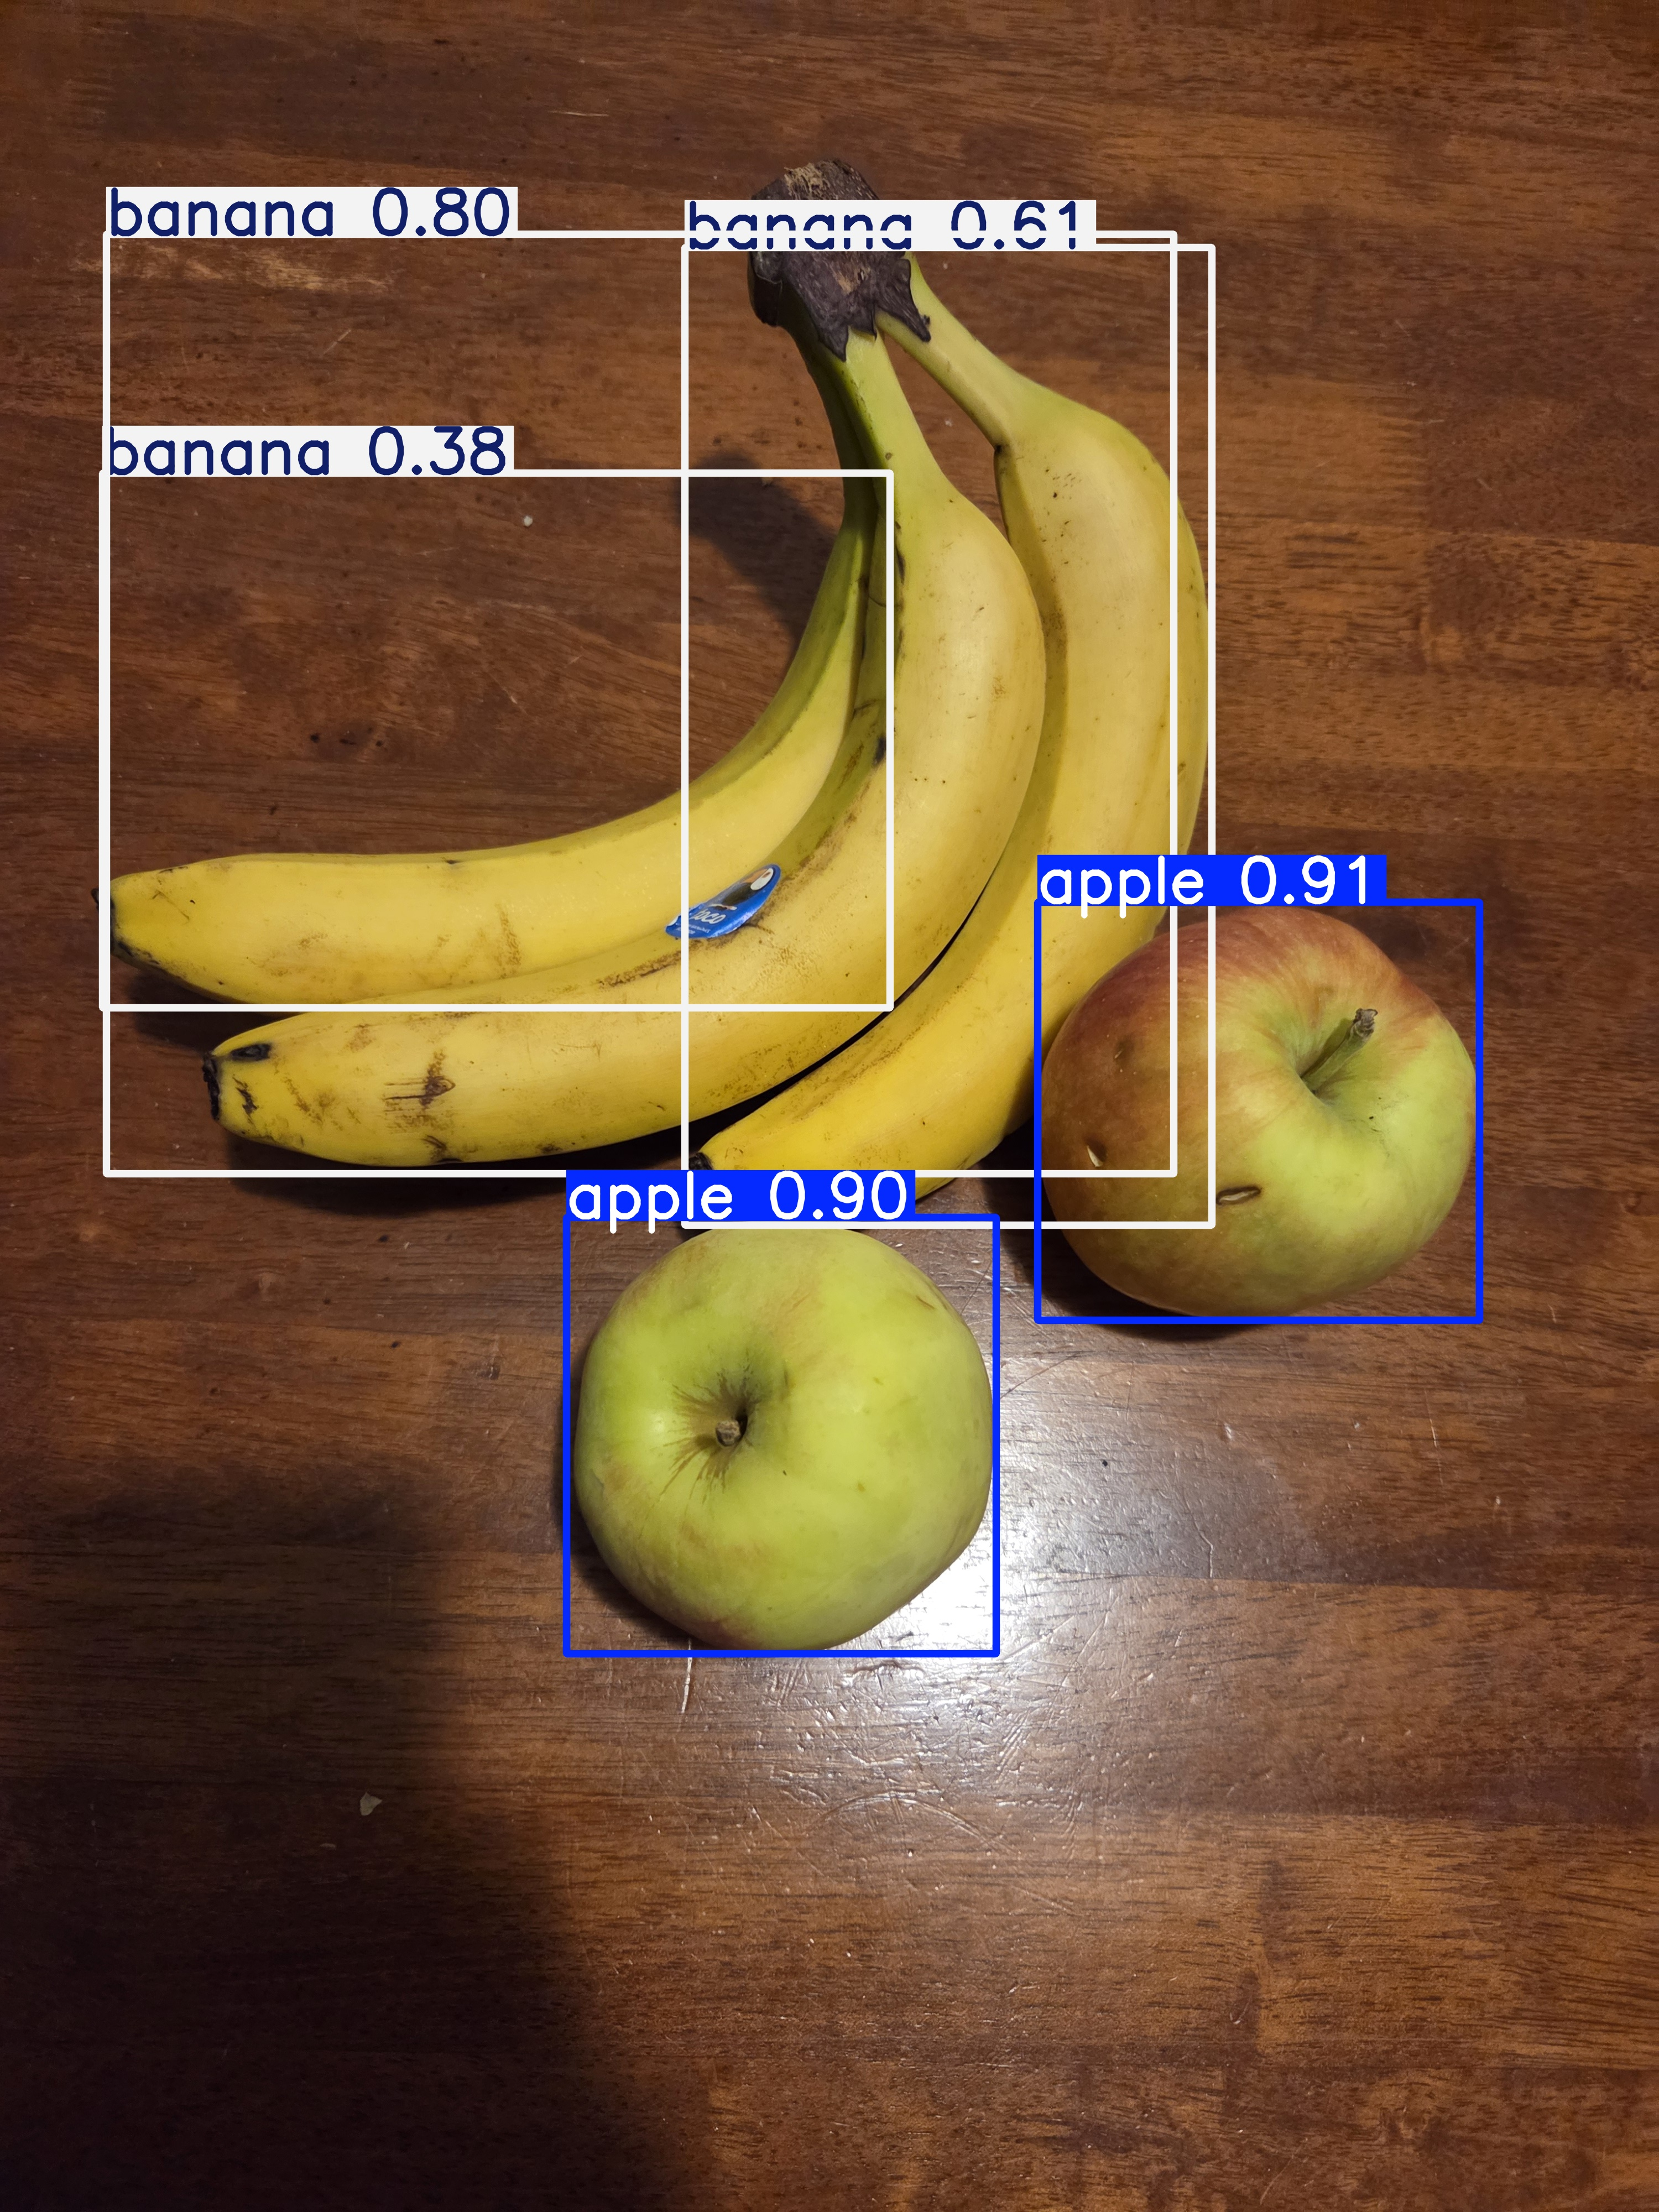

In [4]:
if len(matched_files) == 0:
    print("No annotated image in folder:", latest_predict_folder)
else:
    pred_image_path = os.path.join(latest_predict_folder, matched_files[0])
    display(Image(filename=pred_image_path))

##Calorie estimation
After detecting and classifying food items, the calorie information obtained from USDA FoodData Central is assigned to each detected item in the image.

In [5]:
#Counting calories based on images

#Calories per piece
calorie_dict = {
    "apple": 95, "banana": 105, "blackberry": 1, "blueberry": 1, "bread": 80, "cevap": 75,
    "egg": 70, "grape": 2, "grapefruit": 52, "half pita bread": 85, "lemon": 17,
    "mandarin orange": 47, "orange": 62, "pear": 101, "pita bread": 170, "potato": 130,
    "raspberry": 1, "slice of bread": 80, "strawberry": 4, "watermelon": 86
}


class_names = results[0].names
pred_classes = results[0].boxes.cls.cpu().numpy().astype(int)

#Counting number of occurances of each class
counts = Counter([class_names[c] for c in pred_classes])

#Counting calories
total_calories = 0
print("Detected objects and calories per piece\n")
for cls, count in counts.items():
    calories = calorie_dict.get(cls, 0)
    total = calories * count
    total_calories += total
    print(f"{cls} (x{count}) -> {calories} cal/1 pc = {total} cal")

print(f"\nTotal number of calories: {total_calories} cal")


Detected objects and calories per piece

apple (x2) -> 95 cal/1 pc = 190 cal
banana (x3) -> 105 cal/1 pc = 315 cal

Total number of calories: 505 cal
